In [1]:
!pip install matplotlib
!pip install seaborn

# visualization with python libraries

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = r'diamonds.csv'
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [6]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

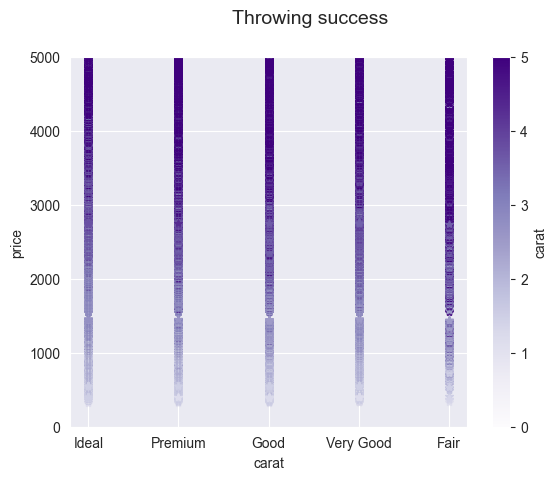

In [7]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(cut,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("carat")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [8]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

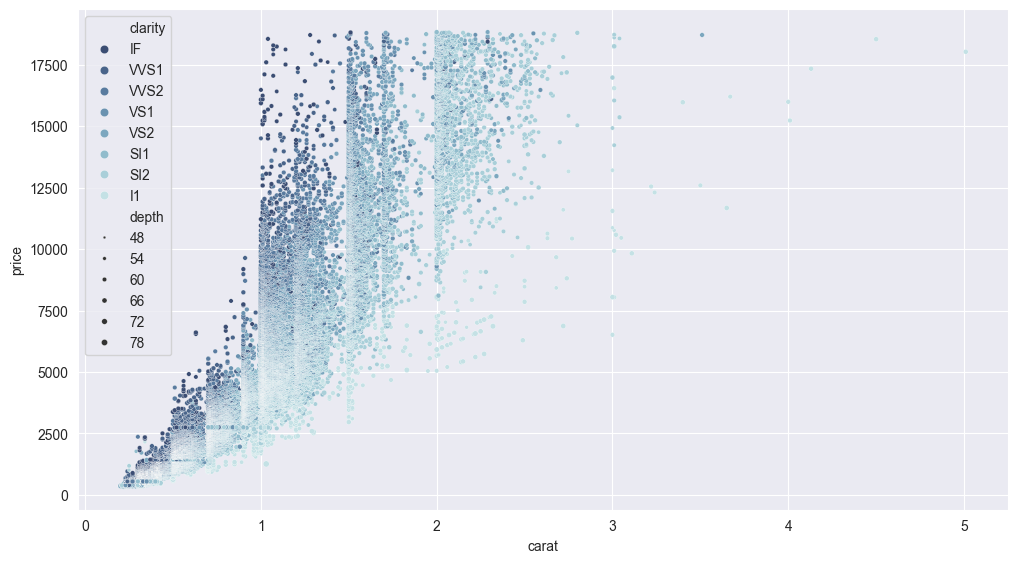

In [9]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

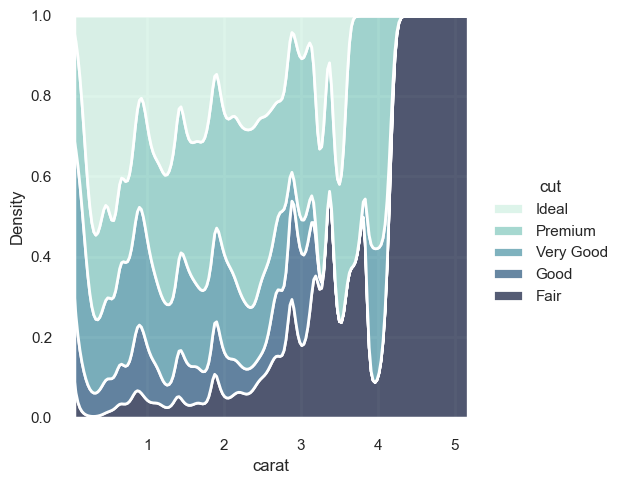

In [10]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

* 여기에 답을 작성해주세요.

1번 시각화의 경우, 다이아몬드 데이터를 컷을 기준으로 분류하여 각각의 컷에 대해 다이아몬드의 무게(carat)에 따른 가격(price)의 분포를 확인하고자 하는 시각화로 추정되며, 다이아몬드 무게에 따라 가격의 증감을 시각적으로 확인 가능하다는 효과가 있습니다.
개선 방안으로는 각각의 컷이 어떠한 의미인지 알기 힘들다는 문제가 있어, 각각의 컷에 대해 어떠한 컷인지 설명이 있었으면 좋을 것 같습니다.

2번 시각화의 경우다이아몬드의 무게, 가격, 투명도에 따른 분포를 확인하는 시각화 입니다. 다이아몬드의 무게와 가격에 더해, 투명도에 따른 차이를 각각의 데이터 포인트로 확인할 수 있습니다.
개선 방안으로 투명도에 따른 분류를 통해 데이터를 보는 것이 투명도에 의한 다이아몬드 가치 비교에 더 용이하다고 생각하여 x축에 해당 순서를 따르도록 하는 등의 방법을 통해 개선하였으면 합니다.

3번 시각화의 경우, 다이아몬드 크기에 대한 컷의 추이를 알아보기 위한 그래프로 추정되며, 컷에 따른 무게 분포를 한눈에 파악 가능하다는 효과가 있습니다. 
개선 방안으로는 각각의 컷이 나누어져 있지 않고 합쳐져 있어 컷 별로 비교하기 함들다는 점이 있습니다. 각각의 컷 별로 분류한 그래프를 같이 제공하여도 도움이 될 것 같습니다.

2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

* 여기에 답을 작성해주세요.

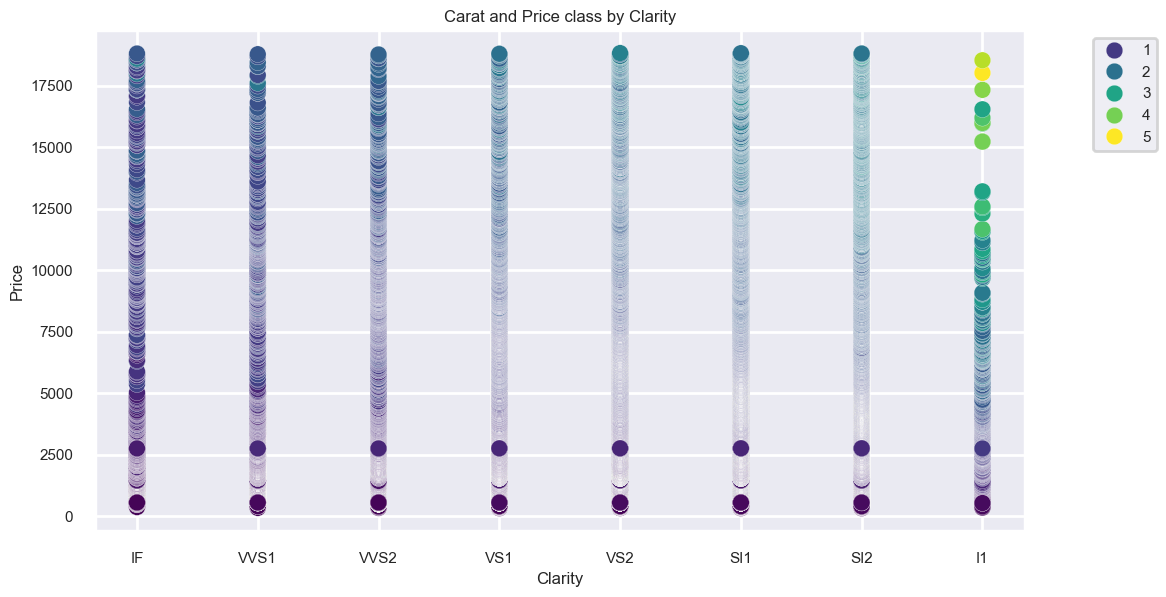

In [24]:
# 여기에 공통과제 2번 코드를 작성해주세요. 주석을 꼼꼼하게 작성하여 왜 이렇게 시각화를 했는지 설명해주시면 더 좋습니다!

# 2번 시각화 개선
f, ax = plt.subplots(figsize=(12, 6.5))
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

# 어떤 표인지 설명하기 위해 표에 제목과 x축, y축을 추가하였습니다.
ax.set_title("Carat and Price class by Clarity")
ax.set_xlabel("Clarity")
ax.set_ylabel("Price")

sns.scatterplot(x="clarity",
                y="price",
                hue="carat",  # 색깔을 바꾸는 기준을 캐럿(carat)으로 변경하였습니다
                palette="viridis",  # viridis 팔레트가 변하는 값에 대해 명시적으로 보이는 것 같아 viridis 팔레트로 변경하였습니다.
                hue_order=clarity_ranking,
                linewidth=0.2,
                data=df, ax=ax)

# 각각의 색이 어떠한 캐럿을 나타내는지를 표의 바깥으로 이동 시키기 위한 코드입니다.
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

# 시각화 추가과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


* 여기에 답을 작성해주세요.

In [ ]:
# 여기에 시각화 코드 혹은 태블로 public 링크를 첨부해주세요.